In [1]:
import quandl
import pandas as pd
from matplotlib import pyplot as plt
import requests
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import scipy.stats as st
from numpy_ext import rolling_apply # multipler parameters
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
symbols = pd.read_csv("crypto_ohlc/symbols.csv").symbol.tolist()
df = ((pd.concat([pd.read_csv(f"crypto_ohlc/{symbol}.csv", index_col='date', parse_dates=True)
        ['close'].rename(symbol)for symbol in symbols],axis=1,sort=True)))
df = df.loc[:,~df.columns.duplicated()]
df.head()

BTCUSDT  ETHUSDT  BNBUSDT  NEOUSDT  LTCUSDT  QTUMUSDT  ADAUSDT  \
date                                                                         
2020-01-01  7200.85   130.77  13.7184    8.850    41.62     1.603  0.03348   
2020-01-02  6965.71   127.19  13.0105    8.462    39.43     1.533  0.03269   
2020-01-03  7344.96   134.35  13.6474    8.888    42.23     1.629  0.03417   
2020-01-04  7354.11   134.20  13.8092    9.077    42.78     1.642  0.03434   
2020-01-05  7358.75   135.37  14.0532    9.020    43.30     1.631  0.03460   

            XRPUSDT  EOSUSDT  ONEUSDT  ...  ZECUSDT  IOSTUSDT  CELRUSDT  \
date                                   ...                                
2020-01-01  0.19305   2.6039  0.00466  ...    28.07  0.004817   0.00362   
2020-01-02  0.18750   2.4593  0.00470  ...    27.02  0.004605   0.00340   
2020-01-03  0.19338   2.6396  0.00478  ...    28.41  0.004819   0.00355   
2020-01-04  0.19305   2.6481  0.00475  ...    29.91  0.004869   0.00355   
2020-01-05  0.19453   2.6865  0.00466  ...    30.81  0.004916   0.00349   

            DASHUSDT  OMGUSDT  THETAUSDT  ENJUSDT  MITHUSDT  MATICUSDT  \
date                                                                     
2020-01-01     41.84   0.6214    0.08656  0.07963   0.00757    0.01496   
2020-01-02     40.04   0.5950    0.08443  0.07371   0.00699    0.01467   
2020-01-03     43.92   0.6248    0.08771  0.07800   0.00739    0.01512   
2020-01-04     46.19   0.6246    0.09394  0.07720   0.00728    0.01484   
2020-01-05     51.17   0.6367    0.09421  0.07637   0.00734    0.01483   

            ATOMUSDT  
date                  
2020-01-01     4.380  
2020-01-02     4.096  
2020-01-03     4.237  
2020-01-04     4.250  
2020-01-05     4.200  

[5 rows x 38 columns]

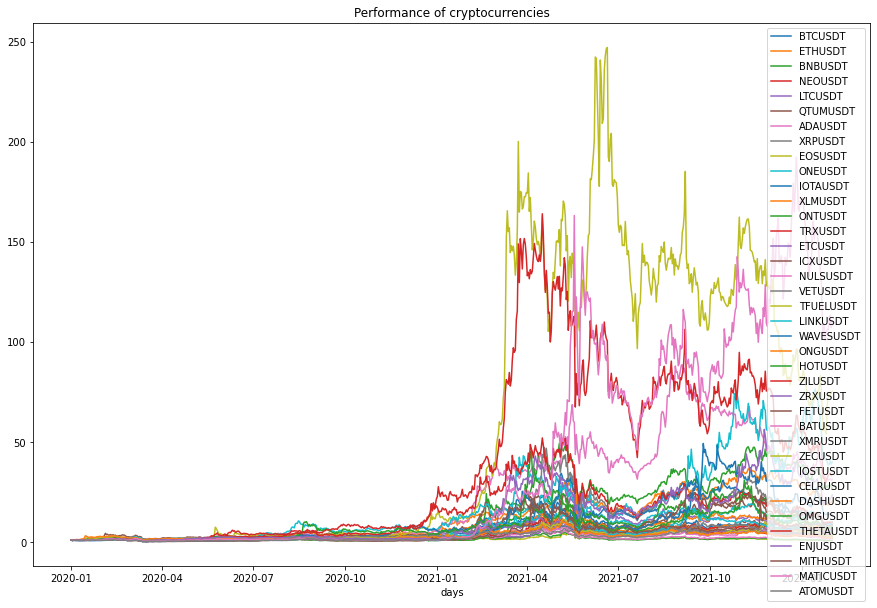

ETHUSDT and BNBUSDT: p-value = 0.03979705332444582
ETHUSDT and FETUSDT: p-value = 0.009294446232473275
ETHUSDT and ATOMUSDT: p-value = 0.023721913440312683
BNBUSDT and ETHUSDT: p-value = 0.04184327180902625
BNBUSDT and ONEUSDT: p-value = 0.017484822695047326
BNBUSDT and TFUELUSDT: p-value = 0.03356023967788704
BNBUSDT and ONGUSDT: p-value = 0.017847752585666694
BNBUSDT and HOTUSDT: p-value = 0.03491978636054913
BNBUSDT and FETUSDT: p-value = 0.04605206033659679
BNBUSDT and CELRUSDT: p-value = 0.018390725167988196
BNBUSDT and ENJUSDT: p-value = 0.02378173173397498
BNBUSDT and MATICUSDT: p-value = 0.038107528953613565
NEOUSDT and TFUELUSDT: p-value = 0.0001684619737509815
NEOUSDT and HOTUSDT: p-value = 0.018482944552887164
NEOUSDT and ZILUSDT: p-value = 0.025957842103161946
NEOUSDT and THETAUSDT: p-value = 2.6834950126713157e-07
LTCUSDT and BTCUSDT: p-value = 0.03861984946462687
LTCUSDT and IOTAUSDT: p-value = 0.0190484896026411
LTCUSDT and XLMUSDT: p-value = 0.00039515054718914565
LTCUS

WAVESUSDT and TRXUSDT: p-value = 0.01116972877720734
WAVESUSDT and VETUSDT: p-value = 0.015683923691441275
WAVESUSDT and TFUELUSDT: p-value = 0.001632307403118933
WAVESUSDT and ONGUSDT: p-value = 8.897822036597178e-05
WAVESUSDT and HOTUSDT: p-value = 0.006923414180555478
WAVESUSDT and FETUSDT: p-value = 0.0023848624756069073
WAVESUSDT and OMGUSDT: p-value = 0.042239187944367554
WAVESUSDT and THETAUSDT: p-value = 0.01907919031528317
ONGUSDT and ETHUSDT: p-value = 0.03418164222454803
ONGUSDT and BNBUSDT: p-value = 0.009574291195622732
ONGUSDT and QTUMUSDT: p-value = 0.022383863688809253
ONGUSDT and ADAUSDT: p-value = 0.009979372077112915
ONGUSDT and XRPUSDT: p-value = 0.005212552926376681
ONGUSDT and IOTAUSDT: p-value = 0.03279373127168058
ONGUSDT and TRXUSDT: p-value = 0.0018682625614575505
ONGUSDT and VETUSDT: p-value = 0.0014384162716002712
ONGUSDT and TFUELUSDT: p-value = 0.03851453444051624
ONGUSDT and WAVESUSDT: p-value = 0.00010944247282061185
ONGUSDT and HOTUSDT: p-value = 0.0098

MITHUSDT and DASHUSDT: p-value = 0.006560933853022412
MITHUSDT and THETAUSDT: p-value = 0.0006217928037544199
MATICUSDT and BNBUSDT: p-value = 0.03431794557039632
MATICUSDT and ONEUSDT: p-value = 0.03274629846865262
MATICUSDT and CELRUSDT: p-value = 0.03781541470290243
ATOMUSDT and ETHUSDT: p-value = 0.014003139677686655
ATOMUSDT and ONEUSDT: p-value = 0.0030698077520654433
ATOMUSDT and FETUSDT: p-value = 0.03033057537430436
ATOMUSDT and BATUSDT: p-value = 0.023245696792688585
ATOMUSDT and CELRUSDT: p-value = 0.01721653317572078
ATOMUSDT and ENJUSDT: p-value = 0.0074358629487091725


In [3]:
norm_prices = df.divide(df.iloc[0])

plt.figure(figsize = (15, 10))
plt.plot(norm_prices)
plt.xlabel('days')
plt.title('Performance of cryptocurrencies')
plt.legend(symbols)
plt.show()

result_list = []
for a1 in df.columns:
    for a2 in df.columns:
        if a1 != a2:
            test_result = ts.coint(df[a1], df[a2])
            if test_result[1] < 0.05:
                print(a1 + ' and ' + a2 + ': p-value = ' + str(test_result[1]))
                result_list.append((a1, a2, test_result[1]))

In [4]:
import statsmodels.formula.api as sm
import statsmodels.tsa.stattools as ts

def z_score(yport):
    zscore = (yport[-1]  - yport.mean()) / yport.std()
    
    return zscore

def upToOut(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (1,0)
    long A short B
    """
    balanceDict['A']['available'] += balanceDict['A']['position'] * (ANewPrice - AOldOrderPrice + AOldOrderPrice) 
    balanceDict['A']['position'] -= balanceDict['A']['position']
    balanceDict['B']['available'] += abs(balanceDict['B']['position']) * (BOldOrderPrice - BNewPrice + BOldOrderPrice)
    balanceDict['B']['position'] -= balanceDict['B']['position']  
    
def upToDown(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (1,-1)
    """
    balanceDict['A']['available'] += balanceDict['A']['position'] * (ANewPrice - AOldOrderPrice + AOldOrderPrice) 
    balanceDict['A']['position'] -= balanceDict['A']['position']
    balanceDict['B']['available'] += abs(balanceDict['B']['position']) * (BOldOrderPrice - BNewPrice + BOldOrderPrice) 
    balanceDict['B']['position'] -= balanceDict['B']['position']   

    balanceDict['A']['available'] -=  ANewPrice * abs(aPos)
    balanceDict['A']['position'] += aPos
    balanceDict['B']['available'] -= BNewPrice * abs(bPos)
    balanceDict['B']['position'] += -(bPos * aPos)
    
def outToUp(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (0,1)
    """
    
    balanceDict['A']['available'] -= ANewPrice * abs(aPos)
    balanceDict['A']['position'] += aPos
    balanceDict['B']['available'] -= BNewPrice * abs(bPos)
    balanceDict['B']['position'] += -(bPos * aPos)
    
def outToDown(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (0,-1)
    """
    balanceDict['A']['available'] -=  ANewPrice * abs(aPos)
    balanceDict['A']['position'] += aPos
    balanceDict['B']['available'] -= BNewPrice * abs(bPos)
    balanceDict['B']['position'] += -(bPos * aPos)
    
def downToOut(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (-1,0)
    """
    balanceDict['A']['available'] += abs(balanceDict['A']['position']) * (AOldOrderPrice - ANewPrice + AOldOrderPrice)
    balanceDict['A']['position'] -= balanceDict['A']['position']
    balanceDict['B']['available'] += balanceDict['B']['position'] * (BNewPrice - BOldOrderPrice + BOldOrderPrice)
    balanceDict['B']['position'] -= balanceDict['B']['position']  
    
def downToUp(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (-1,1)
    """
    balanceDict['A']['available'] += abs(balanceDict['A']['position']) * (AOldOrderPrice - ANewPrice + AOldOrderPrice)
    balanceDict['A']['position'] -= balanceDict['A']['position']
    balanceDict['B']['available'] += balanceDict['B']['position'] * (BNewPrice - BOldOrderPrice + BOldOrderPrice)
    balanceDict['B']['position'] -= balanceDict['B']['position']   
    
    balanceDict['A']['available'] -= ANewPrice * abs(aPos)
    balanceDict['A']['position'] += aPos
    balanceDict['B']['available'] -= BNewPrice * abs(bPos)
    balanceDict['B']['position'] += -(bPos * aPos)


strategy = {(1,0): upToOut, 
            (1,-1):upToDown,
            (0,1): outToUp,
            (0,-1):outToDown,
            (-1,0):downToOut,
            (-1,1):downToUp}    

[pair trade]ETHUSDT-BNBUSDT 4.11133918%
[pair trade]ETHUSDT-FETUSDT -0.36209102%
[pair trade]ETHUSDT-ATOMUSDT -0.96398738%
[pair trade]BNBUSDT-ETHUSDT 0.36245503%
[pair trade]BNBUSDT-ONEUSDT 0.00083493%
[pair trade]BNBUSDT-TFUELUSDT 0.48593201%
[pair trade]BNBUSDT-ONGUSDT -0.44323152%
[pair trade]BNBUSDT-HOTUSDT 0.63737342%
[pair trade]BNBUSDT-FETUSDT 0.19249994%
[pair trade]BNBUSDT-CELRUSDT -0.16148006%
[pair trade]BNBUSDT-ENJUSDT 0.32084206%
[pair trade]BNBUSDT-MATICUSDT 0.07529313%
[pair trade]NEOUSDT-TFUELUSDT 0.00486543%
[pair trade]NEOUSDT-HOTUSDT -0.02601515%
[pair trade]NEOUSDT-ZILUSDT 0.02166346%
[pair trade]NEOUSDT-THETAUSDT 0.03750513%
[pair trade]LTCUSDT-BTCUSDT 0.05936285%
[pair trade]LTCUSDT-IOTAUSDT 0.03347440%
[pair trade]LTCUSDT-XLMUSDT -0.06636496%
[pair trade]LTCUSDT-LINKUSDT -0.03710471%
[pair trade]LTCUSDT-HOTUSDT -0.08976902%
[pair trade]LTCUSDT-DASHUSDT 0.06118395%
[pair trade]LTCUSDT-THETAUSDT 0.03756226%
[pair trade]QTUMUSDT-XRPUSDT 0.00499786%
[pair trade]QTUM

[pair trade]HOTUSDT-CELRUSDT 0.00000988%
[pair trade]HOTUSDT-DASHUSDT -0.00001443%
[pair trade]HOTUSDT-MITHUSDT -0.00001329%
[pair trade]ZILUSDT-XLMUSDT 0.00001088%
[pair trade]ZILUSDT-ZRXUSDT -0.00003956%
[pair trade]ZILUSDT-DASHUSDT 0.00004521%
[pair trade]ZRXUSDT-LTCUSDT -0.00125489%
[pair trade]ZRXUSDT-IOTAUSDT -0.00065452%
[pair trade]ZRXUSDT-XLMUSDT 0.00117289%
[pair trade]ZRXUSDT-NULSUSDT -0.00011124%
[pair trade]ZRXUSDT-LINKUSDT 0.00035175%
[pair trade]ZRXUSDT-ZILUSDT 0.00057658%
[pair trade]ZRXUSDT-ZECUSDT -0.00141442%
[pair trade]ZRXUSDT-DASHUSDT -0.00119214%
[pair trade]FETUSDT-ETHUSDT -0.00005595%
[pair trade]FETUSDT-BNBUSDT 0.00014078%
[pair trade]FETUSDT-QTUMUSDT 0.00014500%
[pair trade]FETUSDT-ADAUSDT -0.00046744%
[pair trade]FETUSDT-XRPUSDT 0.00026171%
[pair trade]FETUSDT-TRXUSDT 0.00008537%
[pair trade]FETUSDT-WAVESUSDT -0.00050491%
[pair trade]FETUSDT-ONGUSDT -0.00011335%
[pair trade]FETUSDT-HOTUSDT 0.00055841%
[pair trade]FETUSDT-IOSTUSDT -0.00030003%
[pair trade]FET

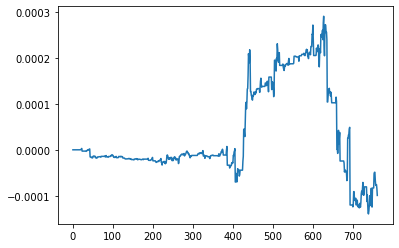

In [5]:
pd.set_option('display.float_format', lambda x: '%.8f' % x)
# import statsmodels.formula.api as sm
# import statsmodels.tsa.stattools as ts

for i in result_list:
    A_symbol, B_symbol = i[0], i[1]

    init = 100000
    pastStatus = 0
    AOldOrderPrice = None
    BOldOrderPrice = None
    aEntryPriceList, bEntryPriceList = [], []
    lookback = 20

    balanceDict = {'A':{'available': 100000, 'position':0}, 'B':{'available': 100000, 'position':0}}
    entryZscore = 1 
    exitZscore = 0
    miniSpread = 0.01
    df1 = df[[A_symbol, B_symbol]]

    hedgeRatio=np.full(df1.shape[0], 0.0)

    for t in np.arange(lookback, len(hedgeRatio)):
        regress_results=sm.ols(formula="{} ~ {}".format(A_symbol, B_symbol), data=df1[(t-lookback):t]).fit() # Note this can deal with NaN in top row
        hedgeRatio[t-1]=regress_results.params[1] ## beta1

    df1['hedgeRatio'] = hedgeRatio 
    df1['yport'] = df1[A_symbol] - df1['hedgeRatio'] * df1[B_symbol]
    df1['zscore'] = rolling_apply(z_score, 20, df1['yport'])
    # df1['yport'].plot()

    history = pd.DataFrame()
    statusList = []
    pl = []
    date, A_available, A_position, B_available, B_position, init, Balance , A_price, B_price= [], [], [], [], [], [], [], [], []
    for index, row in df1.iterrows():
        currStatus = 0 if (pastStatus == 1 and row['zscore'] > -entryZscore) or (pastStatus == -1 and row['zscore'] < exitZscore) else 1 if row['zscore'] < -entryZscore else -1 if (pastStatus == -1 and row['zscore'] > exitZscore or row['zscore'] > entryZscore) else 0
        con = (pastStatus, currStatus)
        if pastStatus != currStatus:
            strategy[con](row[A_symbol], row[B_symbol], currStatus, row['hedgeRatio'], )
            AOldOrderPrice, BOldOrderPrice = row[A_symbol], row[B_symbol]
            aEntryPriceList.append(AOldOrderPrice)
            bEntryPriceList.append(BOldOrderPrice)
        else:
            aEntryPriceList.append(0)
            bEntryPriceList.append(0)
        pastStatus = currStatus
        statusList.append(currStatus)

        date.append(index)
        A_price.append(row[A_symbol])
        B_price.append(row[B_symbol])
        A_available.append(balanceDict['A']['available'])
        A_position.append(balanceDict['A']['position'])
        B_available.append(balanceDict['B']['available'])
        B_position.append(balanceDict['B']['position'])
        Balance.append(balanceDict['A']['available'] + balanceDict['B']['available'])
    #     print('date: ', index, 'balanceDict:', balanceDict)
    np.set_printoptions(suppress=True)
    history['data'] = date
    history['statusList'] = statusList
    history['{}_available'.format(A_symbol)] = A_available
    history['{}_position'.format(A_symbol)] = A_position
    history['{}_price'.format(A_symbol)] = A_price
    history['{}_available'.format(B_symbol)] = B_available
    history['{}_position'.format(B_symbol)] = B_position
    history['{}_price'.format(B_symbol)] = B_price
    history['init'] = [200000]* history.shape[0]
    history['balance'] = history['{}_available'.format(A_symbol)] + (abs(history['{}_position'.format(A_symbol)]) * history['{}_price'.format(A_symbol)]) + history['{}_available'.format(B_symbol)] + (abs(history['{}_position'.format(B_symbol)]) * history['{}_price'.format(B_symbol)])
    history['pnl'] = history['balance'] - history['init']
    history['return'] = history['balance']/200000 - 1
    history.to_csv("pair_trade/{}-{}.xls".format(A_symbol, B_symbol))
    # print(history['return'])
    print('[pair trade]{}-{} {}%'.format(A_symbol, B_symbol, "{:.8f}".format(history['return'].iloc[-1] * 100)))
    plt.clf()
    history['return'].plot()
#     plt.show()
    plt.savefig("pair_trade/{}-{}".format(A_symbol, B_symbol))